In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
df = pd.read_csv("C:\\Users\\gillp\\Desktop\\kAGGLE_1\\P1\\train.csv")

In [4]:
df.head()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2


In [5]:
df.shape

(2018352, 9)

In [6]:
filtered_df = df[df['is_consumption'] == 1]

In [7]:
df = filtered_df.reset_index(drop=True)

In [8]:
df.shape

(1009176, 9)

In [9]:
df.head()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
1,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1
2,0,0,3,656.859,1,2021-09-01 00:00:00,0,5,2
3,0,1,0,59.000,1,2021-09-01 00:00:00,0,7,3
4,0,1,1,501.760,1,2021-09-01 00:00:00,0,9,4


In [10]:
df.index = pd.to_datetime(df["datetime"], format='%Y-%m-%d %H:%M:%S')

In [11]:
df.head()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
datetime,,,,,,,,,
2021-09-01,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
2021-09-01,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1
2021-09-01,0,0,3,656.859,1,2021-09-01 00:00:00,0,5,2
2021-09-01,0,1,0,59.000,1,2021-09-01 00:00:00,0,7,3
2021-09-01,0,1,1,501.760,1,2021-09-01 00:00:00,0,9,4


In [12]:
df['target'] = df['target'].interpolate()

In [13]:
df.isnull().sum()

county                0
is_business           0
product_type          0
target                0
is_consumption        0
datetime              0
data_block_id         0
row_id                0
prediction_unit_id    0
dtype: int64

<Axes: xlabel='datetime'>

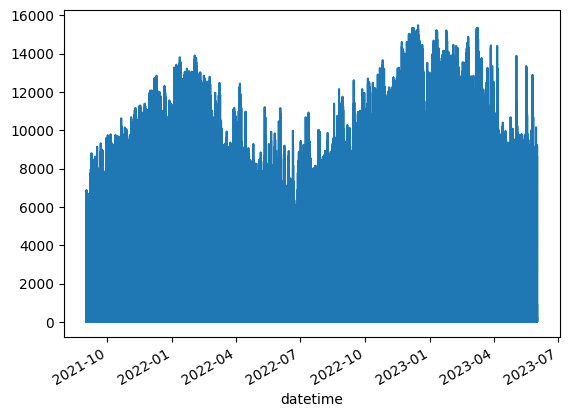

In [14]:
energy = df["target"]
energy.plot()

In [32]:
def df_to_X_y(df, window_sizes = 120):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+120]]
        X.append(row)
        label = df_as_np[i+120]
        y.append(label)
    return np.array(X), np.array(y)

In [33]:
window_size = 120
X,y = df_to_X_y(energy, window_size)
X.shape, y.shape

((1009056, 120, 1), (1009056,))

In [40]:
X_train, y_train = X[:100000], y[:100000]
X_val, y_val = X[100000:120000], y[100000:120000]
X_test, y_test = X[120000:140000], y[120000:140000]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((100000, 120, 1),
 (100000,),
 (20000, 120, 1),
 (20000,),
 (20000, 120, 1),
 (20000,))

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((120,1)))
model1.add(LSTM(64))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, activation='relu'))


model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                16896     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [44]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, )#restore_best_weights=True)


In [45]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 100, callbacks=[early_stopping])

Epoch 1/100
3125/3125 [==============================] - 110s 34ms/step - loss: 1183481.2500 - root_mean_squared_error: 1087.8793 - val_loss: 1607436.1250 - val_root_mean_squared_error: 1267.8470
Epoch 2/100
3125/3125 [==============================] - 106s 34ms/step - loss: 1183481.3750 - root_mean_squared_error: 1087.8793 - val_loss: 1607436.1250 - val_root_mean_squared_error: 1267.8470
Epoch 3/100
3125/3125 [==============================] - 108s 35ms/step - loss: 1183483.0000 - root_mean_squared_error: 1087.8800 - val_loss: 1607436.1250 - val_root_mean_squared_error: 1267.8470
Epoch 4/100
3125/3125 [==============================] - 108s 35ms/step - loss: 1183483.3750 - root_mean_squared_error: 1087.8802 - val_loss: 1607436.1250 - val_root_mean_squared_error: 1267.8470
Epoch 5/100
3125/3125 [==============================] - 109s 35ms/step - loss: 1183482.5000 - root_mean_squared_error: 1087.8798 - val_loss: 1607436.1250 - val_root_mean_squared_error: 1267.8470
Epoch 6/100
3125/312

In [46]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

2082/3125 [==================>...........] - ETA: 13s

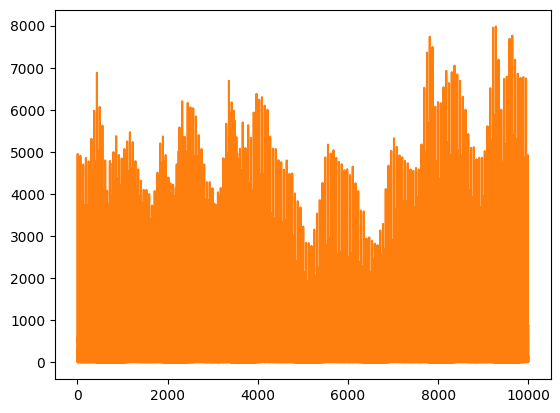

In [23]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'])
plt.plot(train_results['Actuals'])

In [24]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})
test_results

63/63 [==============================] - 0s 7ms/step


,Test Predictions,Actuals
0,35.296959,20.352
1,35.285278,9.983
2,35.277050,192.124
3,35.295410,253.930
4,35.295990,32.589
...,...,...
1995,35.295380,5.480
1996,35.268330,0.536
1997,35.248650,22.764
1998,35.286102,320.079


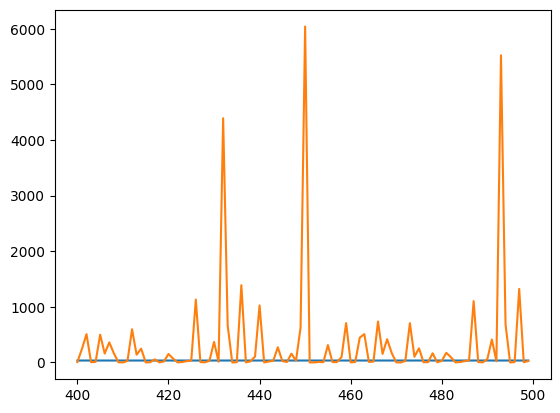

In [25]:
import matplotlib.pyplot as plt
plt.plot(test_results['Test Predictions'][400:500])
plt.plot(test_results['Actuals'][400:500])